In [ ]:
# ensure csv file is in current working directory
# if it isnt, do so or feel free to edit the commented line below

#%cd drive/MyDrive

/content/drive/MyDrive


# Feature Engineering

In [ ]:
# import heart-disease dataset
import pandas as pd
df = pd.read_csv('heart.csv')

In [ ]:
# inspect datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [ ]:
# further inspection
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [ ]:
# one-hot encode categorical values
df = pd.get_dummies(df, columns=['Sex', 'ChestPainType','RestingECG', 'ExerciseAngina', 'ST_Slope'])
df.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_F,Sex_M,ChestPainType_ASY,...,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,40,140,289,0,172,0.0,0,False,True,False,...,False,False,False,True,False,True,False,False,False,True
1,49,160,180,0,156,1.0,1,True,False,False,...,True,False,False,True,False,True,False,False,True,False
2,37,130,283,0,98,0.0,0,False,True,False,...,False,False,False,False,True,True,False,False,False,True
3,48,138,214,0,108,1.5,1,True,False,True,...,False,False,False,True,False,False,True,False,True,False
4,54,150,195,0,122,0.0,0,False,True,False,...,True,False,False,True,False,True,False,False,False,True


In [ ]:
# separate data into labels and features
import numpy as np
df = df.drop(columns=['Sex_F', 'ExerciseAngina_N']).astype(float)
X = np.asarray(df.drop(columns=['HeartDisease']))
Y = np.asarray(df[['HeartDisease']]).reshape(-1,)


In [ ]:
# standardize data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [ ]:
#split data for training and testing
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=.2, random_state=42)

x_train.shape, y_train.shape, x_test.shape, y_test.shape

((734, 18), (734,), (184, 18), (184,))

#Model Selection/Analysis

**Linear Models**

In [ ]:
# examine cross val scores for some models
from sklearn.model_selection import cross_val_score, KFold
from sklearn.linear_model import LogisticRegression, SGDClassifier
kf = KFold(n_splits=5, shuffle=True, random_state=42)

sgd_cv = cross_val_score(SGDClassifier(random_state=42), X, Y, cv=kf)
lr_cv = cross_val_score(LogisticRegression(random_state=42), X, Y, cv=kf)

print('Linear Model CV Scores (Baseline)')
print('-'*40)
print(f'SGD:                 {sgd_cv}  Mean: {np.mean(sgd_cv)}')
print(f'Logistic Regression: {lr_cv}  Mean: {np.mean(lr_cv)}')


Linear Model CV Scores (Baseline)
----------------------------------------
SGD:                 [0.78804348 0.83695652 0.86956522 0.80874317 0.80874317]  Mean: 0.8224103112378238
Logistic Regression: [0.85326087 0.86956522 0.875      0.81420765 0.86338798]  Mean: 0.8550843430743644


Analysis of linear models shows that the features can explain the variance of the labels but so far, Regression performance is mediocre

**Decision Tree Based Models**

In [ ]:
# lets see if tree based algorithms are any better
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, RandomForestClassifier

dt_cv = cross_val_score(DecisionTreeClassifier(random_state=42), X, Y, cv=kf)
ada_cv = cross_val_score(AdaBoostClassifier(random_state=42), X, Y, cv=kf)
gb_cv = cross_val_score(GradientBoostingClassifier(random_state=42), X, Y, cv=kf)
rf_cv = cross_val_score(RandomForestClassifier(random_state=42), X, Y, cv=kf)

print('Decision Tree Model CV Scores')
print('-'*40)
print(f'Decision Tree:  {dt_cv} Mean: {np.mean(dt_cv)}')
print(f'Ada Boost:      {ada_cv} Mean: {np.mean(ada_cv)}')
print(f'Gradient Boost: {gb_cv} Mean: {np.mean(gb_cv)}')
print(f'Random Forest:  {rf_cv} Mean: {np.mean(rf_cv)}')

Decision Tree Model CV Scores
----------------------------------------
Decision Tree:  [0.81521739 0.80434783 0.81521739 0.77595628 0.78142077] Mean: 0.7984319315751959
Ada Boost:      [0.86956522 0.86956522 0.875      0.81420765 0.8579235 ] Mean: 0.8572523164647186
Gradient Boost: [0.88043478 0.88043478 0.90217391 0.83606557 0.87431694] Mean: 0.8746851983844144
Random Forest:  [0.88043478 0.875      0.89130435 0.84153005 0.8579235 ] Mean: 0.8692385364694702


Analysis of Decision Tree based models shows better performance than regression, with Random Forests and Gradient Boosting performing the best

**K Nearest Neighbors**

In [ ]:
# KNN model
from sklearn.neighbors import KNeighborsClassifier
knn_cv = cross_val_score(KNeighborsClassifier(), X, Y, cv=kf)

print('KNN CV Scores')
print('-'*40)
for i in range(1, 11):
  knn_cv = cross_val_score(KNeighborsClassifier(n_neighbors=i), X, Y, cv=kf)
  print(f'{i} Neighbors: {knn_cv} Mean: {np.mean(knn_cv)}')

KNN CV Scores
----------------------------------------
1 Neighbors: [0.79891304 0.85869565 0.85869565 0.79781421 0.80874317] Mean: 0.8245723449750535
2 Neighbors: [0.73913043 0.79891304 0.84782609 0.76502732 0.82513661] Mean: 0.7952066999287242
3 Neighbors: [0.83152174 0.86413043 0.89130435 0.79234973 0.86885246] Mean: 0.849631741506296
4 Neighbors: [0.79347826 0.83152174 0.875      0.79781421 0.87431694] Mean: 0.8344262295081967
5 Neighbors: [0.85326087 0.86956522 0.88586957 0.79781421 0.8579235 ] Mean: 0.8528866714183891
6 Neighbors: [0.8423913  0.84782609 0.88043478 0.78688525 0.87431694] Mean: 0.8463708719410785
7 Neighbors: [0.88043478 0.875      0.89130435 0.83060109 0.85245902] Mean: 0.86595984794488
8 Neighbors: [0.86956522 0.85869565 0.875      0.81967213 0.8579235 ] Mean: 0.8561712995961036
9 Neighbors: [0.88586957 0.86956522 0.875      0.81967213 0.8579235 ] Mean: 0.8616060822047993
10 Neighbors: [0.86413043 0.84782609 0.88586957 0.81420765 0.8579235 ] Mean: 0.85399144689950

KNN model produces simiar results to random forest at k=9 but is most likely sub optimal due to its lack of ability to be tuned

**SVC**

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
# Grid Search for SVC hyper-parameters
# this will take a minute to run
parameters = {'kernel':('linear', 'rbf', 'poly', 'sigmoid'), 'C':list(range(1,16,2)), 'gamma':list(range(1,16,2))}
grid = GridSearchCV(estimator=SVC(random_state=42), param_grid=parameters).fit(x_train, y_train)
print(f'Best Parameters: {grid.best_params_}')

svc_cv = cross_val_score(grid.best_estimator_, X, Y, cv=kf)
print(f'SVC CV Score: {svc_cv} Mean: {np.mean(svc_cv)}')

Best Parameters: {'C': 1, 'gamma': 1, 'kernel': 'linear'}
SVC CV Score: [0.85326087 0.89130435 0.88043478 0.81967213 0.8579235 ] Mean: 0.8605191256830601


SVC's dont seem to outperform decision trees either

**Nueral Network** <br>
(We will evaulate our models with recall and precision from now on due to the nature of the problem:)<br>
Recall = % of true positives identified<br>
Precision = % of identified positives that are true positives

In [ ]:
# Nueral Network implementation
from tensorflow.keras import layers, Model, Input
import tensorflow as tf

tf.random.set_seed(42)

inputs = Input(shape=(x_train.shape[1],))
x = layers.Dense(units=128, activation='relu')(inputs)
x = layers.Dense(units=64, activation='relu')(x)
x = layers.Dense(units=32, activation='relu')(x)
x = layers.Dense(units=16, activation='relu')(x)
outputs = layers.Dense(units=1, activation='sigmoid')(x)

NN_model = Model(inputs=inputs, outputs=outputs)
NN_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['recall', 'precision'])

In [ ]:
# lets train the model
tf.random.set_seed(42)
history = NN_model.fit(x_train, y_train, epochs = 50, batch_size=256, validation_data=(x_test, y_test), )
NN_eval = NN_model.evaluate(x_test, y_test)
print(f'Test Recall:    {NN_eval[1]}')
print(f'Test Precision: {NN_eval[2]}')
NN_eval

Epoch 1/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 765ms/step - loss: 0.6750 - precision: 0.6047 - recall: 0.8778 - val_loss: 0.6227 - val_precision: 0.7197 - val_recall: 0.8879
Epoch 2/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.6024 - precision: 0.7552 - recall: 0.9288 - val_loss: 0.5681 - val_precision: 0.8304 - val_recall: 0.8692
Epoch 3/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.5427 - precision: 0.8213 - recall: 0.9150 - val_loss: 0.5148 - val_precision: 0.9010 - val_recall: 0.8505
Epoch 4/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.4874 - precision: 0.8527 - recall: 0.9000 - val_loss: 0.4647 - val_precision: 0.9100 - val_recall: 0.8505
Epoch 5/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.4371 - precision: 0.8553 - recall: 0.8962 - val_loss: 0.4197 - val_precision: 0.9175 - val_recall: 0.8318
Epoch 6/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.3941 - precision: 0.8622 - recall: 0.8966 - val_loss: 0.3834 - val_precision: 0.9278 - val_recall: 0.8411
Epoch 7/5

[0.32470759749412537, 0.9158878326416016, 0.9333333373069763]

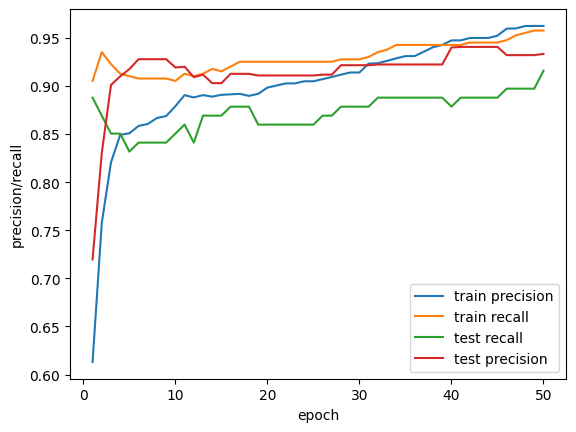

In [ ]:
import matplotlib.pyplot as plt

hist = history.history
epochs = range(1, len(hist['loss']) + 1)

plt.clf()
plt.plot(epochs, hist['precision'], label='train precision')
plt.plot(epochs, hist['recall'],    label='train recall')
plt.plot(epochs, hist['val_recall'], label='test recall')
plt.plot(epochs, hist['val_precision'], label='test precision')

plt.xlabel('epoch')
plt.ylabel('precision/recall')
plt.legend()



Plot Inferences
- A nueral network can memorize training data perfectly with lots of training (epochs = 50) but fails to generalize on test data as well.
- Performance is around the same as simpler models with less training (epochs=25)
- Although Neural Networks perform well on this data, it is too complex of a model to be the right choice given the simplicity of our data


#Reviewing Best Models
 - Gradient Boosting, and Nueral Networks performed the best.
 - Gradient Boosting will be a better choice if we can prove a minimal difference in performance

**Hyper Parameter Tuning for GradientBoostingClassifier**

In [ ]:
# we will grid search hyper parameters using sklearn
# this will take a while
from sklearn.metrics import recall_score, precision_score
parameters = {
    'learning_rate': [0.01, 0.05, 0.1],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_depth': [1, 3, 5],
    'random_state': [42]
}
grid = GridSearchCV(estimator=GradientBoostingClassifier(), param_grid=parameters).fit(x_train, y_train)

default_hp_model = GradientBoostingClassifier(random_state=42).fit(x_train, y_train)
y_pred_df = default_hp_model.predict(x_test)
print('Default Hyper-Parameters')
print('-'*40)
print(f'Recall:    {recall_score(y_test, y_pred_df)}')
print(f'Precision: {precision_score(y_test, y_pred_df)}')
print(f'\n')
y_pred = grid.best_estimator_.predict(x_test)
print('Optimal Hyper-Parameters')
print('-'*40)
print(f'Recall:    {recall_score(y_test, y_pred)}')
print(f'Precision: {precision_score(y_test, y_pred)}')
print(f'Best Parameters: {grid.best_params_}')



Default Hyper-Parameters
----------------------------------------
Recall:    0.8785046728971962
Precision: 0.912621359223301


Optimal Hyper-Parameters
----------------------------------------
Recall:    0.8691588785046729
Precision: 0.9117647058823529
Best Parameters: {'learning_rate': 0.05, 'max_depth': 3, 'min_samples_leaf': 2, 'min_samples_split': 2, 'random_state': 42}


Tweaking hyper-parameters does not seem to change model perform on our desired metrics

**Hyper-Parameter Tuning for RandomForestClassifier**

In [ ]:
# this will also take a while
parameters = {
    'max_features': ['sqrt', 'log2'],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_depth': [1, 3, 5],
    'random_state': [42]
}
grid = GridSearchCV(estimator=RandomForestClassifier(), param_grid=parameters).fit(x_train, y_train)

default_hp_model = RandomForestClassifier(random_state=42).fit(x_train, y_train)
y_pred_df = default_hp_model.predict(x_test)
print('Default Hyper-Parameters')
print('-'*40)
print(f'Recall:    {recall_score(y_test, y_pred_df)}')
print(f'Precision: {precision_score(y_test, y_pred_df)}')
print(f'\n')
y_pred = grid.best_estimator_.predict(x_test)
print('Optimal Hyper-Parameters')
print('-'*40)
print(f'Recall:    {recall_score(y_test, y_pred)}')
print(f'Precision: {precision_score(y_test, y_pred)}')
print(f'Best Parameters: {grid.best_params_}')

Default Hyper-Parameters
----------------------------------------
Recall:    0.897196261682243
Precision: 0.9230769230769231


Optimal Hyper-Parameters
----------------------------------------
Recall:    0.8598130841121495
Precision: 0.8932038834951457
Best Parameters: {'max_depth': 5, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'random_state': 42}


RandomForestClassifier also does not improve with the tweaked hyper parameters

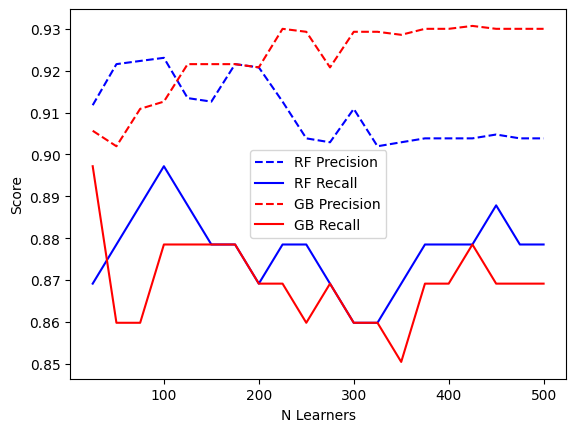

In [ ]:
# as a final measure we will see the effect n_estimators has on recall and precision
from sklearn.metrics import recall_score, precision_score
rf_recalls = []
rf_precisions = []
gb_recalls = []
gb_precisions = []
n_learners = list(range(25, 525, 25))

for n in n_learners:
  rf_model = RandomForestClassifier(n_estimators=n, random_state=42).fit(x_train, y_train)
  y_pred_rf = rf_model.predict(x_test)

  gb_model = GradientBoostingClassifier(n_estimators=n, random_state=42).fit(x_train, y_train)
  y_pred_gb = gb_model.predict(x_test)

  rf_recalls.append(recall_score(y_test, y_pred_rf))
  rf_precisions.append(precision_score(y_test, y_pred_rf))
  gb_recalls.append(recall_score(y_test, y_pred_gb))
  gb_precisions.append(precision_score(y_test, y_pred_gb))

plt.clf()
plt.plot(n_learners, rf_precisions, c='b', label='RF Precision', linestyle='--')
plt.plot(n_learners, rf_recalls, c='b', label='RF Recall')
plt.plot(n_learners, gb_precisions, c='r', label='GB Precision', linestyle='--')
plt.plot(n_learners, gb_recalls, c='r', label='GB Recall')
plt.xlabel('N Learners')
plt.ylabel('Score')
plt.legend()
plt.show()

A random forest model seems to have the least variance between precision and recall values while being comprable to gradient boosted trees. N_learners = 325 seems to produce the highest scores weve seen so far without using a nueral network.

#Results/Discussion
From experiementation we see that random forests and nueral networks perform the best on this data to predict heart disease when trying to optimize precision and recall. <br>
<br>
Precision was consistently higher than recall throughout this project. In the case of detecting heart disease, recall should be prioritized without compromising precision. A preferable model would get a recall score of at least 0.95 with a precision score of at least 0.9.<br>
<br>
We failed to create a model that sufficiently reaches our previously mentioned goals. I do not believe this to be a mistake in model selection but in the data itself. Models would likely perform better with additional features in the data or more training examples given that a nueral network was only about 90% accurate on test data.